<a href="https://colab.research.google.com/github/AnoopmishraInfo/PRODIGY_ML_04/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset detected at: /root/.keras/datasets/rps_extracted/rps
Classes found: ['paper', 'rock', 'scissors']
Found 2520 files belonging to 3 classes.
Using 2016 files for training.
Found 2520 files belonging to 3 classes.
Using 504 files for validation.
Classes: ['paper', 'rock', 'scissors']

Training model...

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6540 - loss: 0.8698 - val_accuracy: 0.9980 - val_loss: 0.0273
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9976 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 3.3414e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 1.0000 - loss: 2.1950e-04 - val_accuracy: 1.0000 - val_loss: 1.4412e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 6.7072e-05 - val_accuracy: 1.0000 - val_loss: 9.4499e-05



Model saved!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


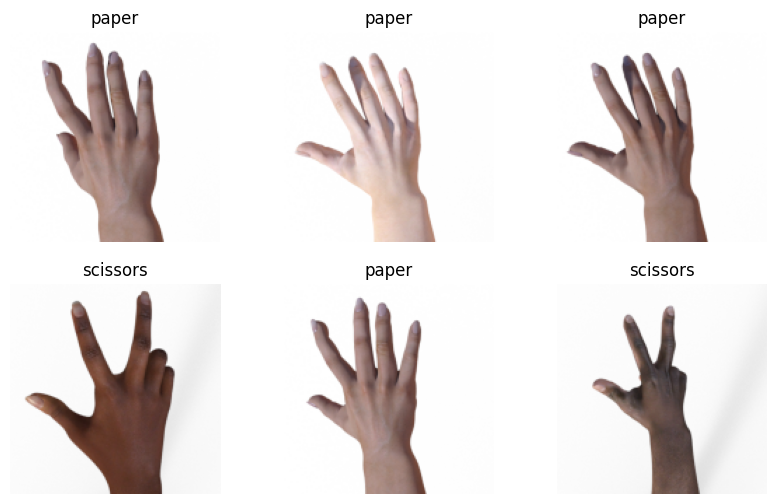


✅ Task 04 Completed Successfully


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

print("Downloading dataset...")

url = "https://storage.googleapis.com/download.tensorflow.org/data/rps.zip"
path = tf.keras.utils.get_file("rps.zip", origin=url, extract=True)

base_dir = os.path.dirname(path)

# Automatically search dataset folder
data_dir = None
for root, dirs, files in os.walk(base_dir):
    if len(dirs) >= 3:  # rps has 3 class folders
        data_dir = root
        break

if data_dir is None:
    raise Exception("Dataset not found!")

print("Dataset detected at:", data_dir)
print("Classes found:", os.listdir(data_dir))

IMG_SIZE = (150,150)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)

train_ds = train_ds.map(lambda x, y: (x/255.0, y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(len(class_names),activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nTraining model...\n")

model.fit(train_ds, validation_data=val_ds, epochs=5)

model.save("gesture_model.h5")
print("\nModel saved!")

# Predictions
plt.figure(figsize=(10,6))

for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i])
        pred = class_names[np.argmax(preds[i])]
        plt.title(pred)
        plt.axis('off')

plt.show()

print("\n✅ Task 04 Completed Successfully")
